In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as p
import numpy as np
import seaborn as sns
import os

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
ap=pd.read_csv(r"C:\Users\saisw\Desktop\AppleStore.csv")

In [ ]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    6268 non-null float64
rating_count_ver    5754 non-null float64
user_rating         6268 non-null float64
user_rating_ver     5754 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     5810 non-null float64
lang.num            7156 non-null float64
vpp_lic             7197 non-null int64
dtypes: float64(7), int64(5), object(5)
memory usage: 955.9+ KB


In [ ]:
ap.shape

(7197, 17)

In [ ]:
ap.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,6.268000e+03,5754.000000,6268.000000,5754.000000,7197.000000,5810.000000,7156.000000,7197.000000
mean,3598.000000,8.631310e+08,1.991345e+08,1.726218,1.480381e+04,575.827424,4.049697,4.069517,37.361817,4.592083,5.466042,0.993053
std,2077.739276,2.712368e+08,3.592069e+08,5.833006,8.098468e+04,4377.060487,0.726943,0.879711,3.737715,0.906285,7.931527,0.083066
min,0.000000,2.816565e+08,5.898240e+05,0.000000,1.000000e+00,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,1799.000000,6.000937e+08,4.692275e+07,0.000000,7.800000e+01,10.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
50%,3598.000000,9.781482e+08,9.715302e+07,0.000000,5.125000e+02,49.000000,4.500000,4.500000,37.000000,5.000000,1.000000,1.000000
75%,5397.000000,1.082310e+09,1.819249e+08,1.990000,3.963500e+03,205.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,7196.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [ ]:
ap.head(50)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292.0,26.0,4.0,4.5,6.3.5,4+,Games,38,5.0,10.0,1
1,1,281796108,Evernote - stay organized,158578688,USD,0.00,161065.0,26.0,4.0,3.5,8.2.2,4+,Productivity,37,5.0,23.0,1
2,2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583.0,2822.0,3.5,4.5,5.0.0,4+,Weather,37,5.0,3.0,1
3,3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241.0,649.0,4.0,4.5,5.10.0,12+,Shopping,37,5.0,9.0,1
4,4,282935706,Bible,92774400,USD,0.00,985920.0,5320.0,4.5,5.0,7.5.1,4+,Reference,37,5.0,45.0,1
5,5,283619399,Shanghai Mahjong,10485713,USD,0.99,8253.0,5516.0,4.0,4.0,1.8,4+,Games,47,5.0,1.0,1
6,6,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487.0,879.0,4.0,4.5,6.12.0,4+,Finance,37,NaN,19.0,1
7,7,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879.0,3594.0,4.0,4.5,8.4.1,12+,Music,37,4.0,1.0,1
8,8,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117.0,4.0,4.5,5.0,3.6.6,4+,Utilities,37,5.0,1.0,1
9,9,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885.0,40.0,4.0,4.0,4.0.4,4+,Games,38,NaN,10.0,1


In [ ]:
ap.isnull().sum()  # checks for the total null values 

Unnamed: 0             0
id                     0
track_name             0
size_bytes             0
currency               0
price                  0
rating_count_tot     929
rating_count_ver    1443
user_rating          929
user_rating_ver     1443
ver                    0
cont_rating            0
prime_genre            0
sup_devices.num        0
ipadSc_urls.num     1387
lang.num              41
vpp_lic                0
dtype: int64

In [ ]:
ap.columns

Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

In [ ]:
col=['rating_count_tot','rating_count_ver']

In [ ]:
for j in col:
    ap[j]=ap[j].fillna(ap[j].mean()) #replace the null values by their mean 
   

In [ ]:
ap.isnull().sum()

Unnamed: 0             0
id                     0
track_name             0
size_bytes             0
currency               0
price                  0
rating_count_tot       0
rating_count_ver       0
user_rating          929
user_rating_ver     1443
ver                    0
cont_rating            0
prime_genre            0
sup_devices.num        0
ipadSc_urls.num     1387
lang.num              41
vpp_lic                0
dtype: int64

In [ ]:
ap.fillna(method='ffill', inplace=True) # replace remaining null values by previous value

In [ ]:
ap.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [ ]:
ap.head(50)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292.0,26.000000,4.0,4.5,6.3.5,4+,Games,38,5.0,10.0,1
1,1,281796108,Evernote - stay organized,158578688,USD,0.00,161065.0,26.000000,4.0,3.5,8.2.2,4+,Productivity,37,5.0,23.0,1
2,2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583.0,2822.000000,3.5,4.5,5.0.0,4+,Weather,37,5.0,3.0,1
3,3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241.0,649.000000,4.0,4.5,5.10.0,12+,Shopping,37,5.0,9.0,1
4,4,282935706,Bible,92774400,USD,0.00,985920.0,5320.000000,4.5,5.0,7.5.1,4+,Reference,37,5.0,45.0,1
5,5,283619399,Shanghai Mahjong,10485713,USD,0.99,8253.0,5516.000000,4.0,4.0,1.8,4+,Games,47,5.0,1.0,1
6,6,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487.0,879.000000,4.0,4.5,6.12.0,4+,Finance,37,5.0,19.0,1
7,7,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879.0,3594.000000,4.0,4.5,8.4.1,12+,Music,37,4.0,1.0,1
8,8,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117.0,4.000000,4.5,5.0,3.6.6,4+,Utilities,37,5.0,1.0,1
9,9,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885.0,40.000000,4.0,4.0,4.0.4,4+,Games,38,5.0,10.0,1


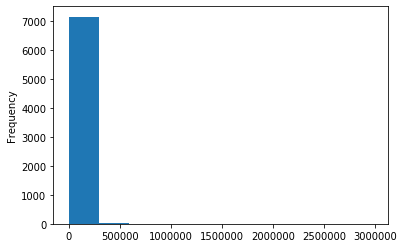

In [ ]:
ap['rating_count_tot'].plot.hist()

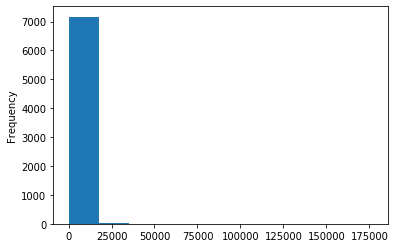

In [ ]:
ap['rating_count_ver'].plot.hist()

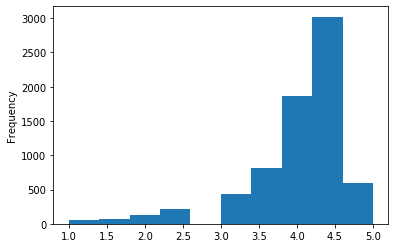

In [ ]:
ap['user_rating'].plot.hist()

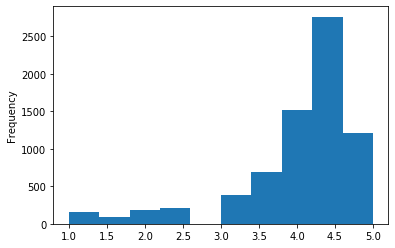

In [ ]:
ap['user_rating_ver'].plot.hist()

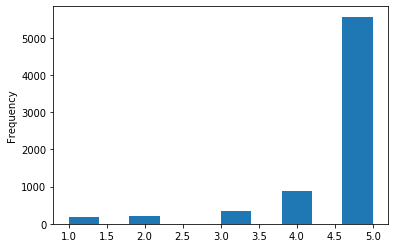

In [ ]:
ap['ipadSc_urls.num'].plot.hist()

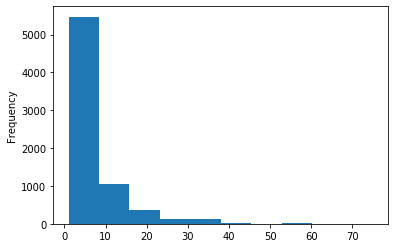

In [ ]:
ap['lang.num'].plot.hist()

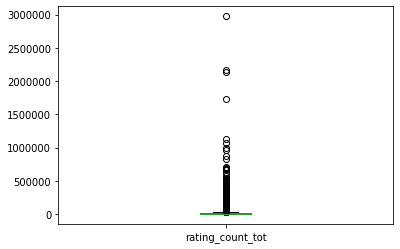

In [ ]:
ap['rating_count_tot'].plot.box()

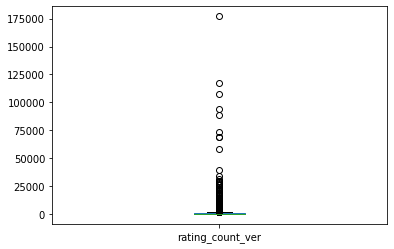

In [ ]:
ap['rating_count_ver'].plot.box()

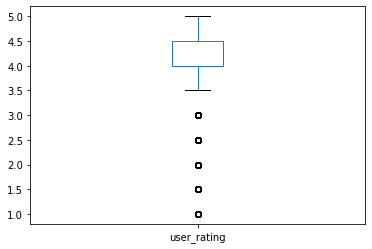

In [ ]:
ap['user_rating'].plot.box()

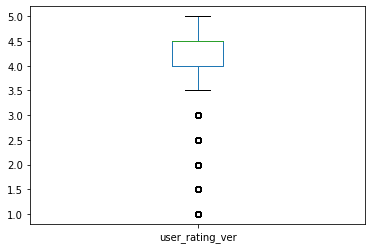

In [ ]:
ap['user_rating_ver'].plot.box()

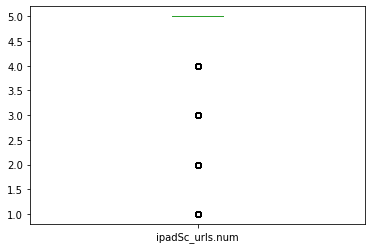

In [ ]:
ap['ipadSc_urls.num'].plot.box()

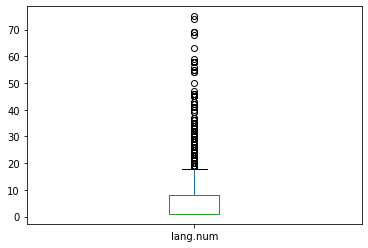

In [ ]:
ap['lang.num'].plot.box()

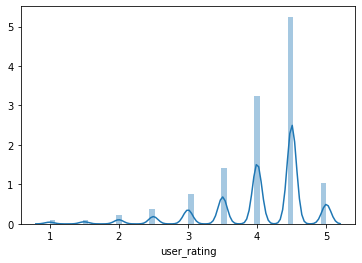

In [ ]:
sns.distplot(ap['user_rating'])

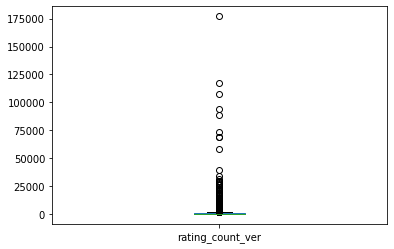

In [ ]:
ap['rating_count_ver'].plot.box()

In [ ]:
ap.head(10)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292.0,26.0,4.0,4.5,6.3.5,4+,Games,38,5.0,10.0,1
1,1,281796108,Evernote - stay organized,158578688,USD,0.00,161065.0,26.0,4.0,3.5,8.2.2,4+,Productivity,37,5.0,23.0,1
2,2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583.0,2822.0,3.5,4.5,5.0.0,4+,Weather,37,5.0,3.0,1
3,3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241.0,649.0,4.0,4.5,5.10.0,12+,Shopping,37,5.0,9.0,1
4,4,282935706,Bible,92774400,USD,0.00,985920.0,5320.0,4.5,5.0,7.5.1,4+,Reference,37,5.0,45.0,1
5,5,283619399,Shanghai Mahjong,10485713,USD,0.99,8253.0,5516.0,4.0,4.0,1.8,4+,Games,47,5.0,1.0,1
6,6,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487.0,879.0,4.0,4.5,6.12.0,4+,Finance,37,5.0,19.0,1
7,7,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879.0,3594.0,4.0,4.5,8.4.1,12+,Music,37,4.0,1.0,1
8,8,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117.0,4.0,4.5,5.0,3.6.6,4+,Utilities,37,5.0,1.0,1
9,9,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885.0,40.0,4.0,4.0,4.0.4,4+,Games,38,5.0,10.0,1


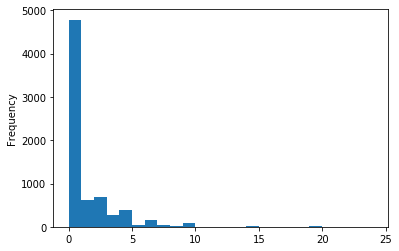

In [ ]:

ap['price'].plot.hist(bins=range(0,25))

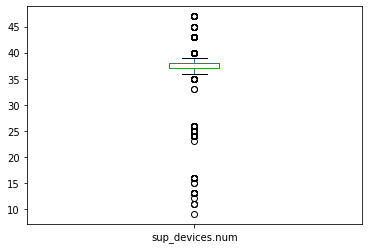

In [ ]:
ap['sup_devices.num'].plot.box()

In [ ]:
ap.head(5)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292.0,26.0,4.0,4.5,6.3.5,4+,Games,38,5.0,10.0,1
1,1,281796108,Evernote - stay organized,158578688,USD,0.00,161065.0,26.0,4.0,3.5,8.2.2,4+,Productivity,37,5.0,23.0,1
2,2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583.0,2822.0,3.5,4.5,5.0.0,4+,Weather,37,5.0,3.0,1
3,3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241.0,649.0,4.0,4.5,5.10.0,12+,Shopping,37,5.0,9.0,1
4,4,282935706,Bible,92774400,USD,0.00,985920.0,5320.0,4.5,5.0,7.5.1,4+,Reference,37,5.0,45.0,1


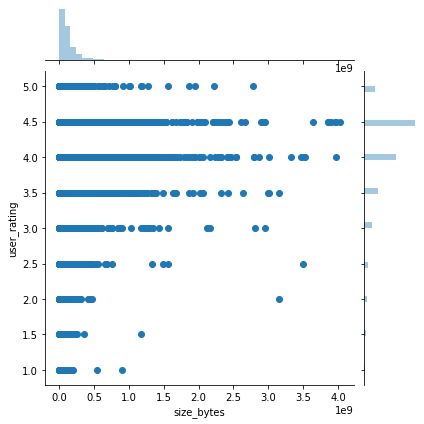

In [ ]:
sns.jointplot(x='size_bytes',y='user_rating',data=ap,kind='scatter')

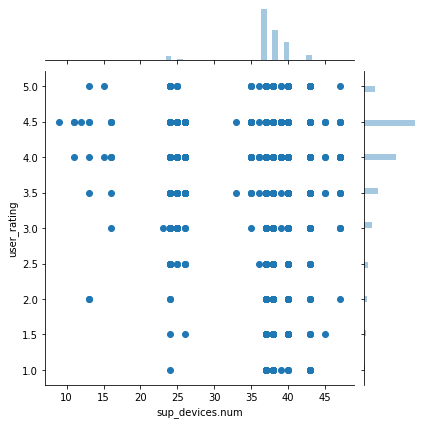

In [ ]:
sns.jointplot(x='sup_devices.num',y='user_rating',data=ap,kind='scatter')

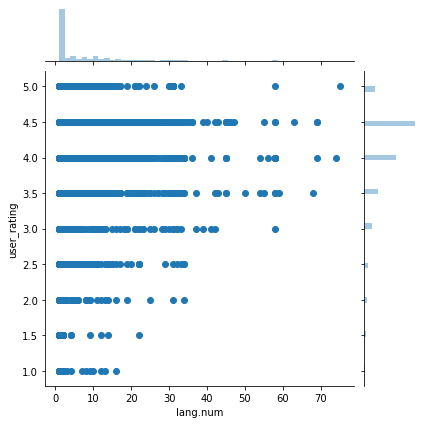

In [ ]:
sns.jointplot(x='lang.num',y='user_rating',data=ap,kind='scatter')

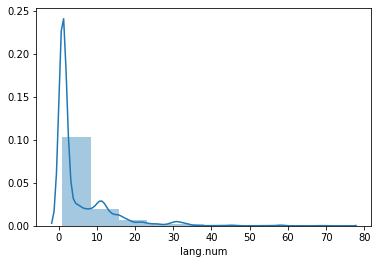

In [ ]:
sns.distplot(ap['lang.num'],kde=True,bins=10)

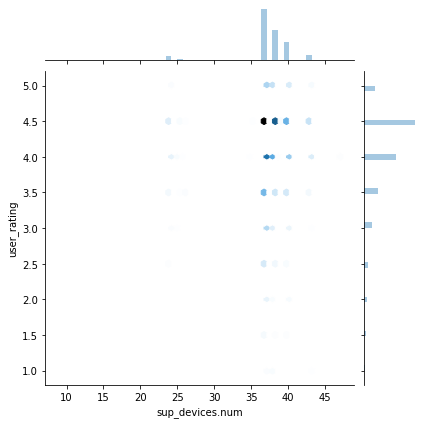

In [ ]:
sns.jointplot(x='sup_devices.num',y='user_rating',data=ap,kind='hex')

In [ ]:
#Normalisation

In [ ]:
ap.head(2)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292.0,26.0,4.0,4.5,6.3.5,4+,Games,38,5.0,10.0,1
1,1,281796108,Evernote - stay organized,158578688,USD,0.00,161065.0,26.0,4.0,3.5,8.2.2,4+,Productivity,37,5.0,23.0,1


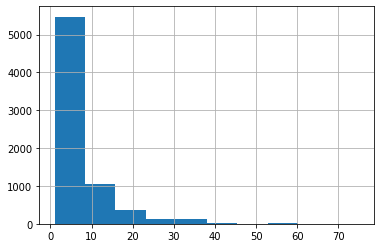

In [ ]:
ap["lang.num"].hist()

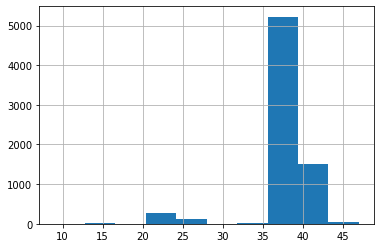

In [ ]:
ap["sup_devices.num"].hist()

In [ ]:
nor=["size_bytes","rating_count_tot"]
st=["lang.num","sup_devices.num"]

In [ ]:
for i  in st:
    print("mean of column:",i," is ",ap[i].mean()," and standard deviation is",ap[i].std())

mean of column: lang.num  is  5.461442267611504  and standard deviation is 7.9264664408247345
mean of column: sup_devices.num  is  37.36181742392664  and standard deviation is 3.7377152388586308


In [ ]:
for i in st: #standerdization
    ap[i]=(ap[i]-ap[i].mean())/ap[i].std() 

In [ ]:
for i  in st:
    print("After standdaisation,mean of column:",i," is ",ap[i].mean()," and stander deviation is",ap[i].std())

After standdaisation,mean of column: lang.num  is  2.113804785262072e-15  and stander deviation is 1.0000000000001186
After standdaisation,mean of column: sup_devices.num  is  1.5508413413177832e-15  and stander deviation is 0.9999999999999201


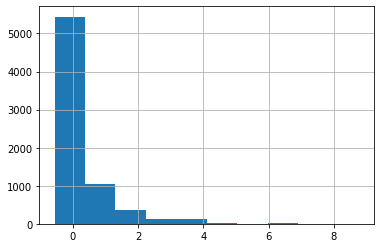

In [ ]:
ap["lang.num"].hist()

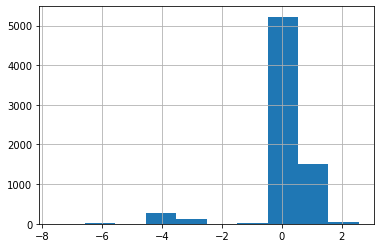

In [ ]:
ap["sup_devices.num"].hist()

In [ ]:
ap.head(10)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292.0,26.0,4.0,4.5,6.3.5,4+,Games,38,5.0,10.0,1
1,1,281796108,Evernote - stay organized,158578688,USD,0.00,161065.0,26.0,4.0,3.5,8.2.2,4+,Productivity,37,5.0,23.0,1
2,2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583.0,2822.0,3.5,4.5,5.0.0,4+,Weather,37,5.0,3.0,1
3,3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241.0,649.0,4.0,4.5,5.10.0,12+,Shopping,37,5.0,9.0,1
4,4,282935706,Bible,92774400,USD,0.00,985920.0,5320.0,4.5,5.0,7.5.1,4+,Reference,37,5.0,45.0,1
5,5,283619399,Shanghai Mahjong,10485713,USD,0.99,8253.0,5516.0,4.0,4.0,1.8,4+,Games,47,5.0,1.0,1
6,6,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487.0,879.0,4.0,4.5,6.12.0,4+,Finance,37,NaN,19.0,1
7,7,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879.0,3594.0,4.0,4.5,8.4.1,12+,Music,37,4.0,1.0,1
8,8,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117.0,4.0,4.5,5.0,3.6.6,4+,Utilities,37,5.0,1.0,1
9,9,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885.0,40.0,4.0,4.0,4.0.4,4+,Games,38,NaN,10.0,1


In [ ]:
for i in nor:
    ap[i]=(ap[i]-ap[i].min())/(ap[i].max()-ap[i].min()) #Normalization of data

In [ ]:
ap.head(10)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,0,281656475,PAC-MAN Premium,0.024892,USD,3.99,0.007157,26.0,4.0,4.5,6.3.5,4+,Games,0.170741,5.0,0.571637,1
1,1,281796108,Evernote - stay organized,0.039248,USD,0.00,0.054145,26.0,4.0,3.5,8.2.2,4+,Productivity,-0.096802,5.0,2.210666,1
2,2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.024826,USD,0.00,0.063396,2822.0,3.5,4.5,5.0.0,4+,Weather,-0.096802,5.0,-0.310916,1
3,3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.031779,USD,0.00,0.088158,649.0,4.0,4.5,5.10.0,12+,Shopping,-0.096802,5.0,0.445558,1
4,4,282935706,Bible,0.022901,USD,0.00,0.331438,5320.0,4.5,5.0,7.5.1,4+,Reference,-0.096802,5.0,4.984407,1
5,5,283619399,Shanghai Mahjong,0.002458,USD,0.99,0.002774,5516.0,4.0,4.0,1.8,4+,Games,2.578629,5.0,-0.563075,1
6,6,283646709,PayPal - Send and request money safely,0.056443,USD,0.00,0.040168,879.0,4.0,4.5,6.12.0,4+,Finance,-0.096802,NaN,1.706350,1
7,7,284035177,Pandora - Music & Radio,0.032209,USD,0.00,0.378824,3594.0,4.0,4.5,8.4.1,12+,Music,-0.096802,4.0,-0.563075,1
8,8,284666222,PCalc - The Best Calculator,0.012088,USD,9.99,0.000375,4.0,4.5,5.0,3.6.6,4+,Utilities,-0.096802,5.0,-0.563075,1
9,9,284736660,Ms. PAC-MAN,0.017249,USD,3.99,0.002650,40.0,4.0,4.0,4.0.4,4+,Games,0.170741,NaN,0.571637,1


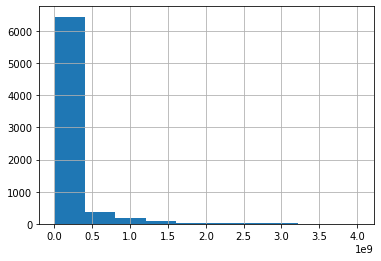

In [ ]:
ap["size_bytes"].hist()

In [ ]:
#hypothesis testing for "user_rating_ver"  column

In [ ]:
pop_mean=ap["user_rating_ver"].mean()
print(pop_mean)

4.06787550368209


In [ ]:
sample=ap["user_rating_ver"].sample(500)

In [ ]:
sample_mean=sample.mean()
print(sample_mean)

4.103


In [ ]:
std_dev=sample.std()
print(std_dev)

0.8445813372734086


In [ ]:
from scipy.stats import norm
from math import sqrt
#one sided hypothesis test(for smaller than in NULL hypothesis)
def one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
         print('True')
    else:
         print('False')
    
alpha = 0.05
#sample_mean = 58.995
#pop_mean = 60.466
sample_size = 500
#std_dev = 33.2419

print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('alpha value is :', alpha, '\n')

reject = one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')
#variation with different parameters can be shown here

H0 : μ <= 4.06787550368209
H1 : μ > 4.06787550368209
alpha value is : 0.05 

actual z value : 1.6448536269514729
hypothesis z value : 0.9299372123926369 

False
Failed to reject NULL hypothesis


In [ ]:
from scipy.stats import norm
from math import sqrt


def two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha/2))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
         print('True')
    else:
         print('False')

alpha = 0.05
#sample_mean = 58.995
#pop_mean = 60.564
sample_size =  600
#std_dev = 33.2419

print('H0 : μ =', pop_mean)
print('H1 : μ !=', pop_mean)
print('alpha value is :', alpha, '\n')

reject = two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')
#variation with different parameters can be shown here

H0 : μ = 4.06787550368209
H1 : μ != 4.06787550368209
alpha value is : 0.05 

actual z value : 1.9599639845400545
hypothesis z value : 1.01869517658184 

False
Failed to reject NULL hypothesis


In [ ]:
#hypothesis testing for "rating_count_ver"  column

In [ ]:
pop_mean=ap["rating_count_ver"].mean()
print(pop_mean)

575.8274244004295


In [ ]:
sample=ap["rating_count_ver"].sample(500)

In [ ]:
sample_mean=sample.mean()
print(sample_mean)

786.0945203336821


In [ ]:
std_dev=sample.std()
print(std_dev)

8093.031009463872


In [ ]:
from scipy.stats import norm
from math import sqrt
#one sided hypothesis test(for smaller than in NULL hypothesis)
def one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
         print('True')
    else:
         print('False')
    
alpha = 0.05
#sample_mean = 58.995
#pop_mean = 60.466
sample_size = 500
#std_dev = 33.2419

print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('alpha value is :', alpha, '\n')

reject = one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')
#variation with different parameters can be shown here

H0 : μ <= 575.8274244004295
H1 : μ > 575.8274244004295
alpha value is : 0.05 

actual z value : 1.6448536269514729
hypothesis z value : 0.5809585053960755 

False
Failed to reject NULL hypothesis


In [ ]:
from scipy.stats import norm
from math import sqrt


def two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha/2))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
         print('True')
    else:
         print('False')

alpha = 0.05
#sample_mean = 58.995
#pop_mean = 60.564
sample_size =  600
#std_dev = 33.2419

print('H0 : μ =', pop_mean)
print('H1 : μ !=', pop_mean)
print('alpha value is :', alpha, '\n')

reject = two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')
#variation with different parameters can be shown here

H0 : μ = 575.8274244004295
H1 : μ != 575.8274244004295
alpha value is : 0.05 

actual z value : 1.9599639845400545
hypothesis z value : 0.6364081567598346 

False
Failed to reject NULL hypothesis


In [ ]:
samp=ap.head(600) # sample data of dataset


In [ ]:
samp

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,0,281656475,PAC-MAN Premium,100788224,USD,3.99,2.129200e+04,26.000000,4.0,4.5,6.3.5,4+,Games,0.170741,5.0,0.572583,1
1,1,281796108,Evernote - stay organized,158578688,USD,0.00,1.610650e+05,26.000000,4.0,3.5,8.2.2,4+,Productivity,-0.096802,5.0,2.212658,1
2,2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,1.885830e+05,2822.000000,3.5,4.5,5.0.0,4+,Weather,-0.096802,5.0,-0.310535,1
3,3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,2.622410e+05,649.000000,4.0,4.5,5.10.0,12+,Shopping,-0.096802,5.0,0.446423,1
4,4,282935706,Bible,92774400,USD,0.00,9.859200e+05,5320.000000,4.5,5.0,7.5.1,4+,Reference,-0.096802,5.0,4.988169,1
5,5,283619399,Shanghai Mahjong,10485713,USD,0.99,8.253000e+03,5516.000000,4.0,4.0,1.8,4+,Games,2.578629,5.0,-0.562854,1
6,6,283646709,PayPal - Send and request money safely,227795968,USD,0.00,1.194870e+05,879.000000,4.0,4.5,6.12.0,4+,Finance,-0.096802,5.0,1.708019,1
7,7,284035177,Pandora - Music & Radio,130242560,USD,0.00,1.126879e+06,3594.000000,4.0,4.5,8.4.1,12+,Music,-0.096802,4.0,-0.562854,1
8,8,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1.117000e+03,4.000000,4.5,5.0,3.6.6,4+,Utilities,-0.096802,5.0,-0.562854,1
9,9,284736660,Ms. PAC-MAN,70023168,USD,3.99,7.885000e+03,40.000000,4.0,4.0,4.0.4,4+,Games,0.170741,5.0,0.572583,1


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from math import sqrt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as RMSE

Coefficients: 
 [0.00663203]
RMSE: 87521690.59


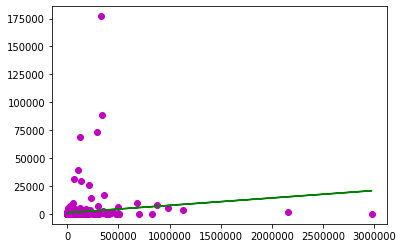

In [ ]:
#using python in built functions

def linear_regression(x, y):
    x = [[i] for i in x]
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x, y)
    
    #prediction 
    y_preds = regr.predict(x)
    
    print('Coefficients: \n', regr.coef_)
    print("RMSE: %.2f" % RMSE(y, y_preds))
    
    plt.scatter(x, y,  color='m')
    plt.plot(x, y_preds, color='g')
    plt.show()
    
x = samp['rating_count_tot']
y = samp['rating_count_ver'] 
linear_regression(x, y)

Coefficients: 
 [296.89468616]
RMSE: 15267379.86


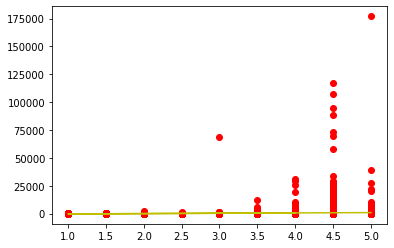

In [ ]:
#using python in built functions

def linear_regression(x, y):
    x = [[i] for i in x]
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x, y)
    
    #prediction 
    y_preds = regr.predict(x)
    
    print('Coefficients: \n', regr.coef_)
    print("RMSE: %.2f" % RMSE(y, y_preds))
    
    plt.scatter(x, y,  color='r')
    plt.plot(x, y_preds, color='y')
    plt.show()
    
x = ap['user_rating']
y = ap['rating_count_ver'] 
linear_regression(x, y)

Coefficients: 
 [0.7855962]
RMSE: 0.45


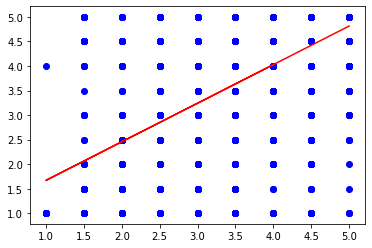

In [ ]:
#using python in built functions

def linear_regression(x, y):
    x = [[i] for i in x]
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x, y)
    
    #prediction 
    y_preds = regr.predict(x)
    
    print('Coefficients: \n', regr.coef_)
    print("RMSE: %.2f" % RMSE(y, y_preds))
    
    plt.scatter(x, y,  color='b')
    plt.plot(x, y_preds, color='r')
    plt.show()
    
x = ap['user_rating']
y = ap['user_rating_ver'] 
linear_regression(x, y)

Coefficients: 
 [4.96764397e-07]
RMSE: 0.54


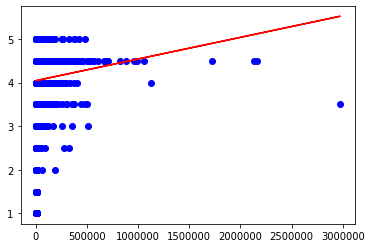

In [ ]:
#using python in built functions

def linear_regression(x, y):
    x = [[i] for i in x]
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x, y)
    
    #prediction 
    y_preds = regr.predict(x)
    
    print('Coefficients: \n', regr.coef_)
    print("RMSE: %.2f" % RMSE(y, y_preds))
    
    plt.scatter(x, y,  color='b')
    plt.plot(x, y_preds, color='r')
    plt.show()
    
x = ap['rating_count_tot']
y = ap['user_rating'] 
linear_regression(x, y)

In [ ]:
ap.corr(method='pearson')

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
Unnamed: 0,1.000000,0.948731,0.051289,-0.075979,-0.166791,-0.060718,-0.029080,-0.028956,0.027556,-0.007731,-0.144401,0.006139
id,0.948731,1.000000,0.077486,-0.075247,-0.188966,-0.066107,-0.005180,-0.011975,0.033605,0.008186,-0.127037,0.017743
size_bytes,0.051289,0.077486,1.000000,0.182392,0.001357,0.002151,0.039596,0.034262,-0.118347,0.088288,0.004042,-0.150418
price,-0.075979,-0.075247,0.182392,1.000000,-0.041929,-0.019394,0.015470,0.015529,-0.115361,0.026756,-0.007063,-0.029942
rating_count_tot,-0.166791,-0.188966,0.001357,-0.041929,1.000000,0.159513,0.051247,0.032359,0.013526,-0.017695,0.127807,-0.005096
rating_count_ver,-0.060718,-0.066107,0.002151,-0.019394,0.159513,1.000000,0.055576,0.050987,0.040188,0.000719,0.004100,0.003524
user_rating,-0.029080,-0.005180,0.039596,0.015470,0.051247,0.055576,1.000000,0.650774,0.041529,0.114298,0.077669,0.037745
user_rating_ver,-0.028956,-0.011975,0.034262,0.015529,0.032359,0.050987,0.650774,1.000000,0.029817,0.094519,0.071557,0.027228
sup_devices.num,0.027556,0.033605,-0.118347,-0.115361,0.013526,0.040188,0.041529,0.029817,1.000000,-0.026774,-0.040299,-0.037109
ipadSc_urls.num,-0.007731,0.008186,0.088288,0.026756,-0.017695,0.000719,0.114298,0.094519,-0.026774,1.000000,0.041436,0.031632


In [ ]:
sns.heatmap(ap.corr)

ValueError: Must pass 2-d input